In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
data_2018 = pd.read_csv('df_2018_total.csv')
data_2019 = pd.read_csv('df_2019_total.csv')
data_2020 = pd.read_csv('df_2020_total.csv')

/Users/yanghang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/yanghang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# What’s the peak periods of the day?

In [3]:
from datetime import datetime
from dateutil import parser

In [20]:
time_series_2018 = pd.DataFrame(np.ones((len(data_2018),1)),index = pd.to_datetime(data_2018['Issue Date']))
time_series_gb_2018 =time_series_2018.groupby(time_series_2018.index).count()
time_series_gb_2018.rename(columns={0:'Num of Violations'})

,Num of Violations
Issue Date,
2018-01-01,3623
2018-01-02,41003
2018-01-03,41785
2018-01-04,1845
2018-01-05,10671
...,...
2018-12-27,34630
2018-12-28,21261
2018-12-29,20101


,0
Issue Date,
2018-01-07,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-01-14,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-01-21,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-01-28,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-02-04,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-02-11,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-02-18,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-02-25,"AxesSubplot(0.125,0.125;0.775x0.755)"
2018-03-04,"AxesSubplot(0.125,0.125;0.775x0.755)"


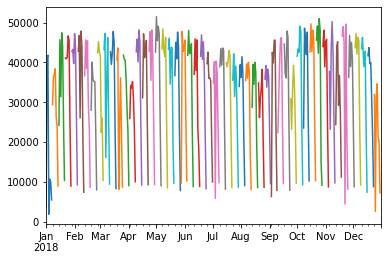

In [21]:
week_2018 = time_series.groupby(time_series.index).count().resample('W')
week_2018.plot()

Text(0, 0.5, 'Number of violations in 2018')

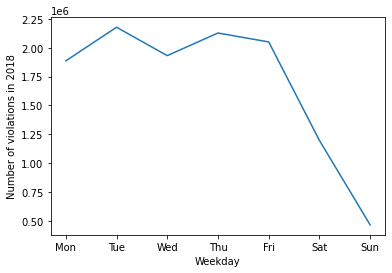

In [22]:
weekday_2018 = time_series_2018.groupby(time_series_2018.index.dayofweek).sum()
weekday_2018.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_2018.plot(legend=False)
plt.xlabel('Weekday')
plt.ylabel('Number of violations in 2018')

Text(0, 0.5, 'Number of violations in 2018')

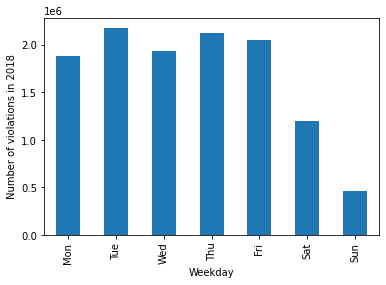

In [23]:
weekday_2018.plot(kind='bar',legend=False)
plt.xlabel('Weekday')
plt.ylabel('Number of violations in 2018')

In [25]:
time_series_2019 = pd.DataFrame(np.ones((len(data_2019),1)),index = pd.to_datetime(data_2019['Issue Date']))
time_series_gb_2019 =time_series_2019.groupby(time_series_2019.index).count()
time_series_gb_2019.rename(columns={0:'Num of Violations'})

,Num of Violations
Issue Date,
2019-01-01,3694
2019-01-02,42828
2019-01-03,46578
2019-01-04,44527
2019-01-05,21335
...,...
2019-12-27,46226
2019-12-28,18918
2019-12-29,6749


,0
Issue Date,
2019-01-06,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-01-13,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-01-20,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-01-27,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-02-03,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-02-10,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-02-17,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-02-24,"AxesSubplot(0.125,0.125;0.775x0.755)"
2019-03-03,"AxesSubplot(0.125,0.125;0.775x0.755)"


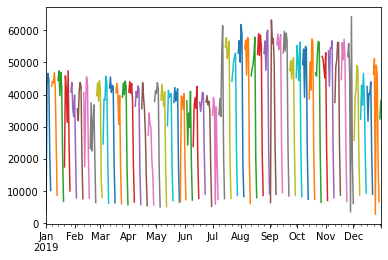

In [26]:
week_2019 = time_series_2019.groupby(time_series_2019.index).count().resample('W')
week_2019.plot()

Text(0, 0.5, 'Number of violations in 2019')

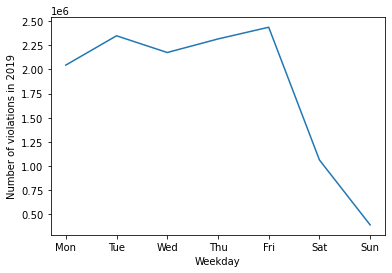

In [27]:
weekday_2019 = time_series_2019.groupby(time_series_2019.index.dayofweek).sum()
weekday_2019.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_2019.plot(legend=False)
plt.xlabel('Weekday')
plt.ylabel('Number of violations in 2019')

Text(0, 0.5, 'Number of violations in 2019')

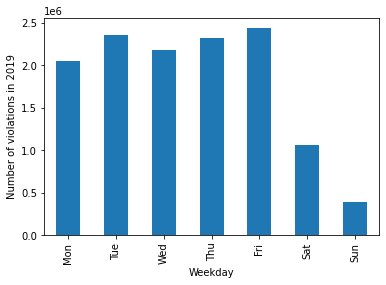

In [28]:
weekday_2019.plot(kind='bar',legend=False)
plt.xlabel('Weekday')
plt.ylabel('Number of violations in 2019')

In [29]:
time_series_2020 = pd.DataFrame(np.ones((len(data_2020),1)),index = pd.to_datetime(data_2020['Issue Date']))
time_series_gb_2020 =time_series_2020.groupby(time_series_2020.index).count()
time_series_gb_2020.rename(columns={0:'Num of Violations'})

,Num of Violations
Issue Date,
2020-01-01,2114
2020-01-02,31555
2020-01-03,35762
2020-01-04,20612
2020-01-05,7182
...,...
2020-12-27,7326
2020-12-28,48567
2020-12-29,51154


,0
Issue Date,
2020-01-05,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-01-12,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-01-19,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-01-26,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-02-02,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-02-09,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-02-16,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-02-23,"AxesSubplot(0.125,0.125;0.775x0.755)"
2020-03-01,"AxesSubplot(0.125,0.125;0.775x0.755)"


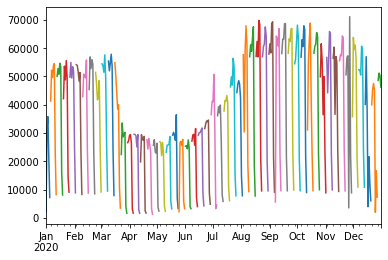

In [30]:
week_2020 = time_series_2020.groupby(time_series_2020.index).count().resample('W')
week_2020.plot()

Text(0, 0.5, 'Number of violations in 2020')

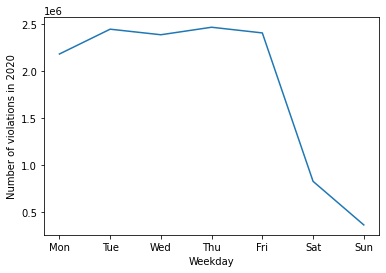

In [31]:
weekday_2020 = time_series_2020.groupby(time_series_2020.index.dayofweek).sum()
weekday_2020.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_2020.plot(legend=False)
plt.xlabel('Weekday')
plt.ylabel('Number of violations in 2020')

Text(0, 0.5, 'Number of violations in 2020')

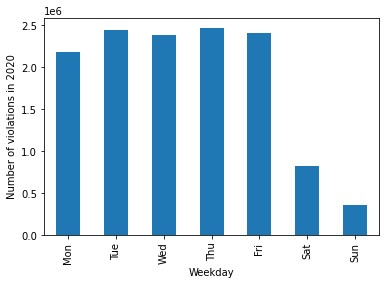

In [32]:
weekday_2020.plot(kind='bar',legend=False)
plt.xlabel('Weekday')
plt.ylabel('Number of violations in 2020')

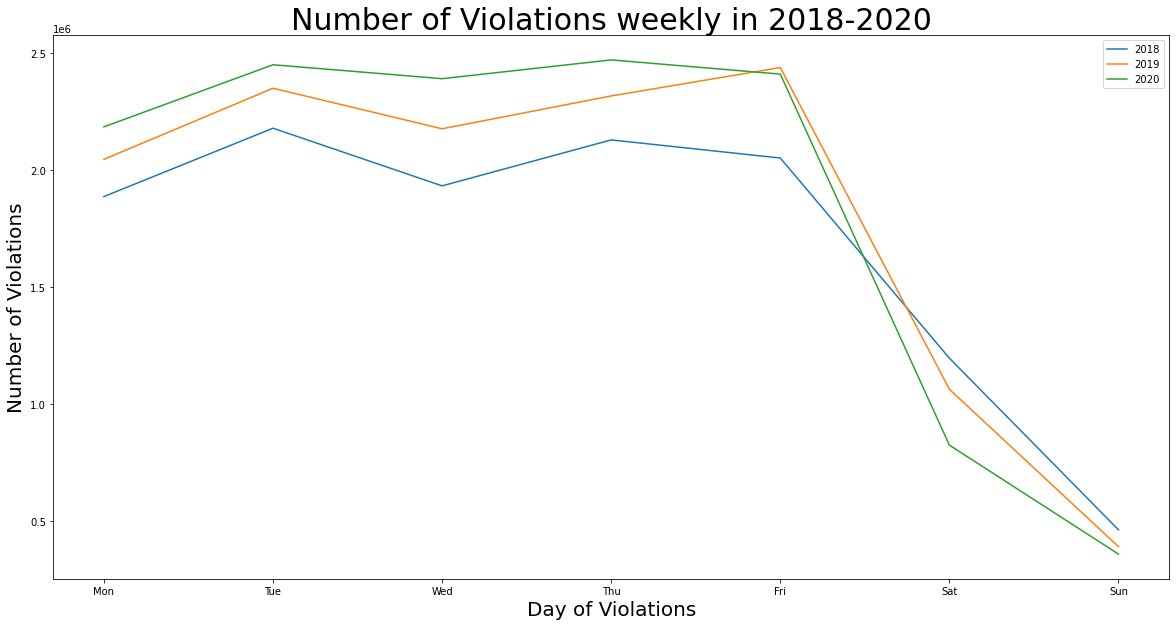

In [45]:
plt.subplots(figsize =(20, 10))

X = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

X_axis = np.arange(len(X))

  
plt.plot(X_axis, list(weekday_2018[0]), label = '2018')
plt.plot(X_axis, list(weekday_2019[0]), label = '2019')
plt.plot(X_axis, list(weekday_2020[0]), label = '2020')
  
plt.xticks(X_axis, X)

plt.xlabel("Day of Violations", fontdict = {'fontsize' : 20})
plt.ylabel("Number of Violations", fontdict = {'fontsize' : 20})
plt.title("Number of Violations weekly in 2018-2020", fontdict = {'fontsize' : 30})
        
plt.legend()
plt.show()

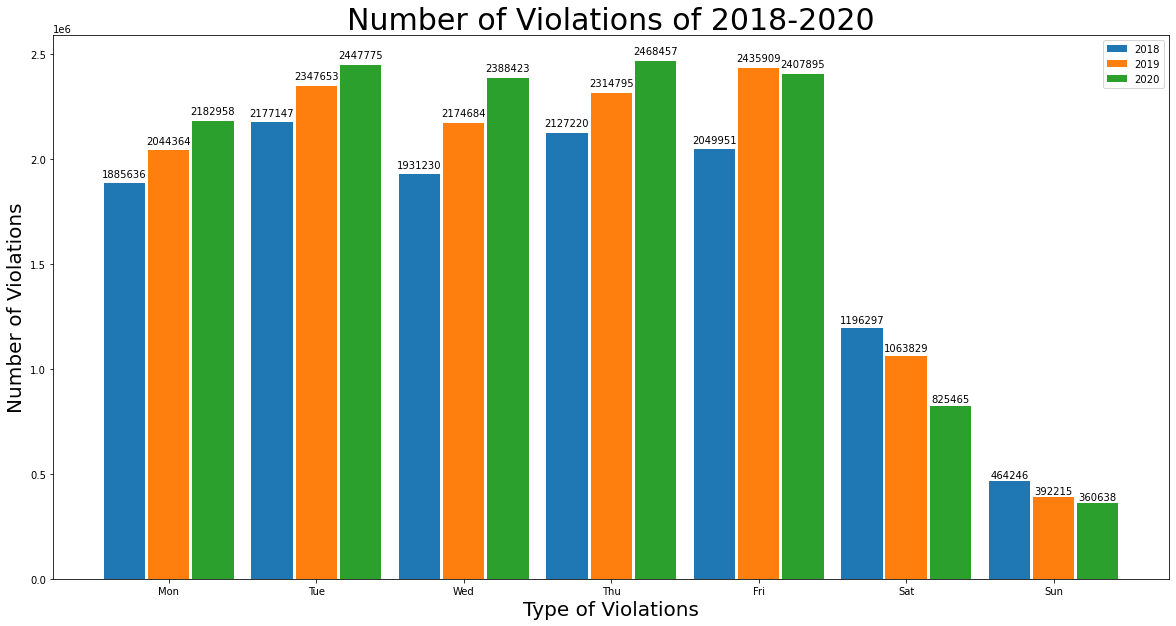

In [55]:
fig, ax = plt.subplots(figsize =(20, 10))

X = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
X_axis = np.arange(len(X))

  
a = plt.bar(X_axis - 0.3, list(weekday_2018[0]), 0.28, label = '2018')
b = plt.bar(X_axis, list(weekday_2019[0]), 0.28, label = '2019')
c = plt.bar(X_axis + 0.3, list(weekday_2020[0]), 0.28, label = '2020')
  
plt.xticks(X_axis, X)

plt.xlabel("Type of Violations", fontdict = {'fontsize' : 20})
plt.ylabel("Number of Violations", fontdict = {'fontsize' : 20})
plt.title("Number of Violations of 2018-2020", fontdict = {'fontsize' : 30})

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(a)
autolabel(b)
autolabel(c)

plt.legend()
plt.show()

## TEST

In [3]:
data_2020.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Year,Month,Day
0,5109306230,88009,NY,MED,2020-01-01,7,SUBN,JEEP,V,0,...,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN,2020,1,1
1,5109308240,LCH6921,PA,PAS,2020-01-01,7,SW,CHEVR,V,0,...,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN,2020,1,1
2,5600024162,EHM3610,NY,PAS,2020-01-02,12,SUBN,MAZDA,V,0,...,NaN,0,NaN,MOBILE BUS LANE VIOLATION,NaN,NaN,NaN,2020,1,2
3,5600024150,AB64604,CT,PAS,2020-01-02,12,PK,TOYOT,V,0,...,NaN,0,NaN,MOBILE BUS LANE VIOLATION,NaN,NaN,NaN,2020,1,2
4,5600024046,T713131C,NY,OMT,2020-01-02,12,4DSD,NISSA,V,0,...,NaN,0,NaN,MOBILE BUS LANE VIOLATION,NaN,NaN,NaN,2020,1,2


In [5]:
data_2020 = data_2020['Violation Description'].dropna()

In [6]:
len(data_2020)

6686521

In [7]:
data_2019 = data_2019['Violation Description'].dropna()

In [8]:
len(data_2019)

3031192

In [9]:
data_2018 = data_2018['Violation Description'].dropna()

In [10]:
len(data_2018)

2586391

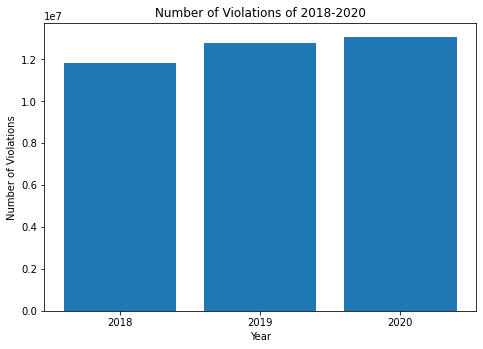

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['2018', '2019', '2020']
students = [11831727,12773449,13081611]
ax.bar(langs,students)
#plt.show()
plt.xlabel("Year")
plt.ylabel("Number of Violations")
plt.title("Number of Violations of 2018-2020")
plt.show()

In [19]:
#data_2020 = data_2020['Violation Description']
len(data_2020)

13081611

In [20]:
len(data_2018)

11831727

In [21]:
len(data_2019)

12773449

In [23]:
（13081611- 12773449）/12773449

SyntaxError: invalid character in identifier (<ipython-input-23-a14d5fc71a86>, line 1)

In [26]:
data_2018['Issue Date']

0           2018-01-01
1           2018-01-01
2           2018-01-01
3           2018-01-01
4           2018-01-01
               ...    
11831722    2018-08-15
11831723    2018-05-17
11831724    2018-05-24
11831725    2018-06-12
11831726    2018-05-24
Name: Issue Date, Length: 11831727, dtype: object

In [28]:
orginal_2018 = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2018.csv')

/Users/yanghang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (29,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
orginal_2018['Issue Date']

0           01/01/2018
1           01/01/2018
2           01/01/2018
3           01/01/2018
4           01/01/2018
               ...    
11721318    08/31/2017
11721319    08/31/2017
11721320    08/31/2017
11721321    08/31/2017
11721322    08/31/2017
Name: Issue Date, Length: 11721322, dtype: object